# Rethinking STEM at LSE: A Comparative Analysis of Quantitative Course Offerings at LSE and UCL
---
## Table of Content
1. Introduction
2. Data Acquisition
3. Data Preparation
4. Explanatory Data Analysis (EDA)  
 4.1 Programme and Module Availability   
 4.2 Student Satisfaction  
 4.3 Graduate Outcomes  
5. Conclusion and Recommendations

---
## 1. Introduction
###Problem Statement  
LSE is globally recognised for its excellence in social sciences, but its standing in STEM education is often underappreciated or overlooked. In recent years, however, the boundaries between social sciences and STEM have become increasingly blurred. Fields such as econometrics, data science, and applied mathematics are now central to decision-making across industries, from finance and tech to policy and healthcare. This raises an important question: *how quantitatively "STEM-like" is LSE’s undergraduate curriculum?*

###Goals of the Study & Research Questions  
To explore this, we benchmark LSE’s offerings in Mathematics, Statistics, Econometrics, and Data Science (collectively referred to as **MSED disciplines**) against those at University College London (UCL), a peer institution with a more traditional STEM reputation. Specifically, we aim to answer the following questions:  
**1. Curriculum Offering (Comparison Channel 1 and 2):** To what extent does LSE offer undergraduate modules and programmes in key quantitative STEM areas, and how does this compare to UCL?  
**2. Student Satisfaction (Comparison Channel 3) :** How do students rate the teaching, support, and overall experience in MSED disciplines at each institution?  
**3. Graduate Outcomes (Comparison Channel 4) :** Do employment outcomes (e.g. salaries) of LSE MSED graduates reflect a strong quantitative foundation?

###Originality of the Project        
This project is novel in its multi-faceted, data-driven approach to evaluating the “quantitative STEM strength” of a university traditionally perceived as non-STEM. By combining curriculum structure, student feedback, and graduate outcomes, we offer a holistic analysis that may help inform both prospective students and institutional decision-makers. Unlike prior work focused solely on degree titles or research funding, our study bridges perception and outcome using public datasets and web-scraped content to support evidence-based comparisons.

---
## 2. Data Acquisition

We will web scrape the data required to answer the research questions using the requests and BeautifulSoup libraries.

We will web scrape from the following websites for each comparison channel:

Comparison channel 1: https://www.lse.ac.uk/resources/calendar/courseGuides/undergraduate.htm, https://www.ucl.ac.uk/module-catalogue?collection=drupal-module-catalogue&facetsort=alpha&num_ranks=20&daat=10000&sort=title

Comparison channel 2: https://www.google.com/url?q=https%3A%2F%2Fwww.lse.ac.uk%2Fprogrammes%2Fsearch-courses, https://www.google.com/url?q=https%3A%2F%2Fwww.ucl.ac.uk%2Fprospective-students%2Fundergraduate%2Fundergraduate-courses

Comparison channel 3: https://discoveruni.gov.uk/

Comparison channel 4: https://discoveruni.gov.uk/

Set up cell to import all the required libraries for the report

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

**Comparison channel 1**

We count the number of undergraduate modules in the Mathematics (MA), Statistics (ST), Economics (EC), and Data Science (DS) departments of LSE by web scraping the LSE website https://www.lse.ac.uk/resources/calendar/courseGuides/undergraduate.htm

In [ ]:
# Data Acquisition 1.1
lse_url = "https://www.lse.ac.uk/resources/calendar/courseGuides/undergraduate.htm"
departments = ["MA", "ST", "EC", "DS"]
response = requests.get(lse_url)
soup = BeautifulSoup(response.content, 'lxml')
department_counts = {}
for dept in departments:
    department_counts[dept] = -1 #exclude the department title
for link in soup.find_all("a", href=True):
    text = link.get_text().strip()
    for dept in departments:
        if text.startswith(dept):
            department_counts[dept] += 1
lse_department_counts = department_counts

We then extract the number of econometrics modules under the EC (Economics) department of LSE

In [ ]:
# Data Acquisition 1.2
lse_url = "https://www.lse.ac.uk/resources/calendar/courseGuides/undergraduate.htm"
econometric = 'Econometric'
response = requests.get(lse_url)
soup = BeautifulSoup(response.content, 'lxml')
num_econometrics_modules = 0
for link in soup.find_all("a", href=True):
    text = link.get_text().strip()
    if text.startswith('EC') and econometric in text:
        num_econometrics_modules += 1
lse_num_econometrics_modules = num_econometrics_modules

print('Number of undergraduate mathematics modules at LSE: ', lse_department_counts.get('MA'))
print('Number of undergraduate statistics modules at LSE: ', lse_department_counts.get('ST'))
print('Number of undergraduate econometrics modules at LSE: ', lse_num_econometrics_modules)
print('Number of undergraduate data science modules at LSE: ', lse_department_counts.get('DS'))

Number of undergraduate mathematics modules at LSE:  30
Number of undergraduate statistics modules at LSE:  36
Number of undergraduate econometrics modules at LSE:  7
Number of undergraduate data science modules at LSE:  7


We count the number of undergraduate modules in the Mathematics (MATH), Statistics (STAT), and Economics (ECON) departments of UCL by web scraping from the UCL Module Catalogue https://www.ucl.ac.uk/module-catalogue?collection=drupal-module-catalogue&facetsort=alpha&num_ranks=20&daat=10000&sort=title

In [ ]:
# Data Acquisition 1.3
ucl_num_math = []
ucl_num_econ = []
ucl_num_stat = []

codes = {"MATH", "ECON", "STAT"}

for page in range(1, 331):
    start_rank = 1 + (page - 1) * 20
    url = f'https://www.ucl.ac.uk/module-catalogue?collection=drupal-module-catalogue&facetsort=alpha&num_ranks=20&daat=10000&start_rank={start_rank}&sort=title'

    resp = requests.get(url)
    soup = BeautifulSoup(resp.content, 'lxml')

    for a in soup.find_all("a", href=True):
        href = a["href"]
        #Check for each prefix
        if "-MATH" in href or "-ECON" in href or "-STAT" in href:
            #Extract module code (last 8 chars after last '/')
            code = href.rsplit("/", 1)[-1][-8:]

            # Append to the appropriate list
            prefix = code[:4].lower()
            if prefix == "math":
                ucl_num_math.append(code)
            elif prefix == "econ":
                ucl_num_econ.append(code)
            elif prefix == "stat":
                ucl_num_stat.append(code)
    time.sleep(0.1)


# now `results` is a list like ["MATH0001", "ECON0234", …]
print("MATH codes number:", len(ucl_num_math))
print("ECON codes number:", len(ucl_num_econ))
print("STAT codes number:", len(ucl_num_stat))

MATH codes number: 83
ECON codes number: 69
STAT codes number: 33


We find that UCL does not have a standalone Data Science department like LSE; its data science modules are offered within the Statistics (STAT codes) department. We will only consider the data science modules within the Statistics department at UCL. To ensure a fair comparison, we combine LSE's Statistics and Data Science departments when analysing against UCL's Statistics offerings.W

We then extract the number of econometrics modules under the ECON (Economics) department of UCL

In [ ]:
# Data Acquisition 1.4
import time
import requests
from bs4 import BeautifulSoup
keyword = 'Econometrics'
econometrics_modules_count = 0
for page in range(1, 331):
    start_rank = 1 + (page - 1) * 20
    url = f'https://www.ucl.ac.uk/module-catalogue?collection=drupal-module-catalogue&facetsort=alpha&num_ranks=20&daat=10000&start_rank={start_rank}&sort=title'
    resp = requests.get(url)
    soup = BeautifulSoup(resp.content, 'lxml')
    for a in soup.find_all("a", href = True):
      href = a["href"]
      text = a.get_text().strip()
      if '-ECON' in href and keyword.lower() in text.lower():
        econometrics_modules_count += 1
    time.sleep(0.1)
econometrics_modules_count
ucl_num_metrics = econometrics_modules_count
print('Number of econometrics modules at UCL: ', ucl_num_metrics)
print('Number of undergraduate mathematics modules at UCL: ', len(ucl_num_math))
print('Number of undergraduate statistics and data science modules at UCL: ', len(ucl_num_stat))
print('Number of undergraduate econometrics modules at UCL: ', ucl_num_metrics)

Number of econometrics modules at UCL:  7
Number of undergraduate mathematics modules at UCL:  83
Number of undergraduate statistics and data science modules at UCL:  33
Number of undergraduate econometrics modules at UCL:  7


**Comparison Channel 2: Undergraduate Programmes Offered**

We compare the number of undergraduate programmes offered by the MSED departments at LSE and UCL.

Specifically, we count:

The number of programmes in each individual discipline

The total number of MSED-related programmes offered at each university

To collect the data, we web scraped links within the official undergraduate programme directories:

LSE: https://www.lse.ac.uk/programmes/search-courses

UCL: https://www.ucl.ac.uk/prospective-students/undergraduate/undergraduate-courses

This comparison helps assess how prominently each institution integrates quantitative STEM disciplines into its formal undergraduate curriculum structure. It also complements our module-level analysis by examining the breadth of degree-level opportunities available to prospective students.

We first scrape the LSE MSED programmes

In [ ]:
# Data Acquisition 2.1
url_keywords = {
    'https://www.lse.ac.uk/programmes/search-courses?studyType=b6732bf8-36e3-4461-b325-c925ad870cb4&department=b168aa13-3c57-5fa3-9314-d7db4672dcf3': ['Econometrics', 'BSc'],
    'https://www.lse.ac.uk/programmes/search-courses?studyType=b6732bf8-36e3-4461-b325-c925ad870cb4&department=c41878ab-cc75-5f46-8848-71b1dfa77178': ['BSc'],
    'https://www.lse.ac.uk/programmes/search-courses?studyType=b6732bf8-36e3-4461-b325-c925ad870cb4&department=4ccf9897-e53d-5b5a-8070-363ee41a8c5d': ['BSc']
}

programme_names = {}
for url, keywords in url_keywords.items():
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    programmes = soup.find_all('h3', class_='card__title')
    matching_programmes = []
    for programme in programmes:
        text = programme.get_text(strip=True)
        #Check if keywords are in the text
        if all(keyword in text for keyword in keywords):
            matching_programmes.append(text)
    programme_names[url] = matching_programmes

In [ ]:
# Data Acquisition 2.2
keys = list(programme_names.keys())
econometrics_programmes_lse = programme_names[keys[0]]
mathematics_programmes_lse = programme_names[keys[1]]
statistics_data_science_programmes_lse = programme_names[keys[2]]
statistics_programmes_lse = []
data_science_programmes_lse = []
for programme in statistics_data_science_programmes_lse:
    if 'Data Science' in programme:
        data_science_programmes_lse.append(programme)
    else:
        statistics_programmes_lse.append(programme)

num_econometrics_programmes_lse = len(econometrics_programmes_lse)
num_mathematics_programmes_lse = len(mathematics_programmes_lse)
num_statistics_programmes_lse = len(statistics_programmes_lse)
num_data_science_programmes_lse = len(data_science_programmes_lse)

#list of all LSE undergraduate programmes in econometrics, mathematics, statistics and data science
lse_programmes = econometrics_programmes_lse + mathematics_programmes_lse + statistics_programmes_lse + data_science_programmes_lse
print('Number of undergraduate programmes in Econometrics, Mathematics, Statistics and Data Science at LSE: ', len(lse_programmes))
lse_programmes

Number of undergraduate programmes in Econometrics, Mathematics, Statistics and Data Science at LSE:  9


['BSc Econometrics and Mathematical Economics',
 'BSc Financial Mathematics and Statistics',
 'BSc Mathematics and Economics',
 'BSc Mathematics with Data Science',
 'BSc Mathematics with Economics',
 'BSc Actuarial Science',
 'BSc Mathematics, Statistics and Business',
 'BSc Data Science',
 'BSc Economics and Data Science']

Then we scrape the UCL MSED programmes

In [ ]:
# Data Acquisition 2.3
url_keywords = { "https://www.ucl.ac.uk/prospective-students/undergraduate/degrees?query=econometrics&year=2026": ['Econometrics', 'BSc'],
    "https://www.ucl.ac.uk/prospective-students/undergraduate/degrees?query=mathematics&year=2026": ['Mathematics', 'BSc'],
    "https://www.ucl.ac.uk/prospective-students/undergraduate/degrees?query=statistics&year=2026": ['Statistics', 'BSc'],
    "https://www.ucl.ac.uk/prospective-students/undergraduate/degrees?query=data%20science&year=2026": ['Data Science','BSc']
}

programme_names = {}
for url, keywords in url_keywords.items():
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    programmes = soup.find_all('a')
    matching_programmes = []
    for programme in programmes:
        text = programme.get_text(strip=True)
        # Check if keywords are in the text
        if all(keyword in text for keyword in keywords):
            matching_programmes.append(text)
    programme_names[url] = matching_programmes
matching_programmes

['Data Science BSc', 'Social Sciences with Data Science BSc']

In [ ]:
# Data Acquisition 2.4
keys = list(programme_names.keys())
econometrics_programmes_ucl = programme_names[keys[0]]
mathematics_programmes_ucl = programme_names[keys[1]]
mathematics_programmes_ucl = mathematics_programmes_ucl[:7] #remove 'Chemistry with Mathematics BSc'
statistics_programmes_ucl = programme_names[keys[2]]
data_science_programmes_ucl = programme_names[keys[3]]
data_science_programmes_ucl = data_science_programmes_ucl[:1] #remove 'Social Sciences with Data Science BSc'

num_econometrics_programmes_ucl = len(econometrics_programmes_ucl)
num_mathematics_programmes_ucl = len(mathematics_programmes_ucl)
num_statistics_programmes_ucl = len(statistics_programmes_ucl)
num_data_science_programmes_ucl = len(data_science_programmes_ucl)

#list of all UCL undergraduate programmes in econometrics, mathematics, statistics and data science
ucl_programmes = econometrics_programmes_ucl + mathematics_programmes_ucl + statistics_programmes_ucl + data_science_programmes_ucl
print('Number of undergraduate programmes in Econometrics, Mathematics, Statistics and Data Science at UCL: ', len(ucl_programmes))
ucl_programmes

Number of undergraduate programmes in Econometrics, Mathematics, Statistics and Data Science at UCL:  13


['Mathematics BSc',
 'Mathematics with Economics BSc',
 'Mathematics with Management Studies BSc',
 'Mathematics with Modern Languages BSc',
 'Mathematics and Physics BSc',
 'Mathematics with Mathematical Physics BSc',
 'Mathematics and Statistical Science BSc',
 'Statistics BSc',
 'Statistics, Economics and Finance BSc',
 'Statistics and Management for Business BSc',
 'Statistics, Economics and a Language BSc',
 'Economics and Statistics BSc (Econ)',
 'Data Science BSc']

For Comparison channel 3 and comparison channel 4, we scrape the data required from the webpages of all the LSE and UCL MSED programmes that is available on Discover Uni https://discoveruni.gov.uk/

We define the two following lists of LSE and UCL urls:

In [ ]:
#URLS of all the LSE Mathematics, Statistics, Econometrics and Data Science programmes data provided by Discover Uni
lse_urls = ['https://www.discoveruni.gov.uk/course-details/10004063/N321-UBACT2/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/N3UD-UBDSC/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/L140-UBEM/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/GN13-UBFIMAST/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/GL11-UBMAEC/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/G140-UBMAWDS/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/G1L1-UBMAWEC/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/G0N0-UBMSB/Full-time']

In [ ]:
#URLS of all the UCL Mathematics, Statistics, Econometrics and Data Science programmes data provided by Discover Uni
ucl_urls = ['https://www.discoveruni.gov.uk/course-details/10007784/UBSMATAPHY18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATASTA18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWECO18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWMAN18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWMPH18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWLAN18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATSING18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSDATSING18/Full-time']

**2. What is the student satisfaction for these quantitative programmes at LSE and UCL?**

**Comparison Channel 3: Student Satisfaction**

We compare National Student Survey (NSS) results for MSED undergraduate programmes at LSE and UCL.

The NSS is an independent UK-wide survey of final-year undergraduates that captures feedback on teaching quality and the overall university experience. While the Discover Uni platform hosts this data, its presentation is highly detailed and text-heavy, making direct comparisons between programmes challenging.

To improve accessibility, we scrape the NSS data and visualise the overall ratings for each key section (e.g. Teaching, Assessment, Support), rather than individual survey questions. This allows for clearer, high-level comparisons between programmes and institutions.

Note: Not all programmes offered for the 2026/27 academic year are currently available on Discover Uni. Therefore, only programmes with complete NSS data available on Discover Uni are included in our analysis.

We scrape the NSS ratings data for the MSED programmes of LSE and UCL from the respective programme webpages within the Discover Uni website

In [ ]:
# Data Acquisition 3.1
#URLS of all the Mathematics, Statistics, Econometrics and Data Science courses at LSE
lse_urls = ['https://www.discoveruni.gov.uk/course-details/10004063/N321-UBACT2/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/N3UD-UBDSC/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/L140-UBEM/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/GN13-UBFIMAST/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/GL11-UBMAEC/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/G140-UBMAWDS/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/G1L1-UBMAWEC/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10004063/G0N0-UBMSB/Full-time']

In [ ]:
# Data Acquisition 3.2
#URLS of all the Mathematics, Statistics, Econometrics and Data Science courses at UCL
ucl_urls = ['https://www.discoveruni.gov.uk/course-details/10007784/UBSMATAPHY18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATASTA18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWECO18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWMAN18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWMPH18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATWLAN18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSMATSING18/Full-time',
            'https://www.discoveruni.gov.uk/course-details/10007784/UBSDATSING18/Full-time']

In [ ]:
# Data Acquisition 3.3
section_names = ["The teaching on my course", "Learning opportunities", "Assessment and feedback", "Academic Support", "Organisation and management", "Learning resources",
                 "Student voice", "Mental wellbeing", "Freedom of expression"]

lse_programme_ratings = []
for url in lse_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    programme = {}
    title_tag = soup.find('h1')
    programme_title = title_tag.get_text(strip=True)
    programme['Programme Title'] = programme_title
    for name in section_names:
        section = soup.find('h2', string = name)
        if section:
            content = section.find_next()
            text = content.get_text(strip=True, separator=' ')
            rating = text[:text.find(".")] # gets rating and description
            rating = rating[:rating.find("%")] # only gets rating
            programme[name] = rating
    lse_programme_ratings.append(programme)
    time.sleep(1)
lse_programme_ratings

[{'Programme Title': 'BSc (Hons) Actuarial Science',
  'The teaching on my course': '85',
  'Learning opportunities': '81',
  'Assessment and feedback': '77',
  'Academic Support': '88',
  'Organisation and management': '81',
  'Learning resources': '88',
  'Student voice': '83',
  'Mental wellbeing': '78',
  'Freedom of expression': '92'},
 {'Programme Title': 'BSc (Hons) Data Science',
  'The teaching on my course': '81',
  'Learning opportunities': '77',
  'Assessment and feedback': '74',
  'Academic Support': '82',
  'Organisation and management': '79',
  'Learning resources': '79',
  'Student voice': '73',
  'Mental wellbeing': '71',
  'Freedom of expression': '84'},
 {'Programme Title': 'BSc (Hons) Econometrics and Mathematical Economics',
  'The teaching on my course': '88',
  'Learning opportunities': '80',
  'Assessment and feedback': '73',
  'Academic Support': '87',
  'Organisation and management': '81',
  'Learning resources': '91',
  'Student voice': '78',
  'Mental wellbe

In [ ]:
# Data Acquisition 3.4
section_names = ["The teaching on my course", "Learning opportunities", "Assessment and feedback", "Academic Support", "Organisation and management", "Learning resources",
                 "Student voice", "Mental wellbeing", "Freedom of expression"]

ucl_programme_ratings = []
for url in ucl_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    programme = {}
    title_tag = soup.find('h1')
    programme_title = title_tag.get_text(strip=True)
    programme['Programme Title'] = programme_title
    for name in section_names:
        section = soup.find('h2', string = name)
        if section:
            content = section.find_next()
            text = content.get_text(strip=True, separator=' ')
            rating = text[:text.find(".")] # gets rating and description
            rating = rating[:rating.find("%")] # only gets rating
            programme[name] = rating
    ucl_programme_ratings.append(programme)
    time.sleep(1)
ucl_programme_ratings

[{'Programme Title': 'BSc (Hons) Mathematics and Physics',
  'The teaching on my course': '76',
  'Learning opportunities': '69',
  'Assessment and feedback': '63',
  'Academic Support': '77',
  'Organisation and management': '69',
  'Learning resources': '83',
  'Student voice': '63',
  'Mental wellbeing': '75',
  'Freedom of expression': '87'},
 {'Programme Title': 'BSc (Hons) Mathematics and Statistical Science',
  'The teaching on my course': '88',
  'Learning opportunities': '80',
  'Assessment and feedback': '88',
  'Academic Support': '91',
  'Organisation and management': '88',
  'Learning resources': '96',
  'Student voice': '82',
  'Mental wellbeing': '88',
  'Freedom of expression': '88'},
 {'Programme Title': 'BSc (Hons) Mathematics with Economics',
  'The teaching on my course': '74',
  'Learning opportunities': '73',
  'Assessment and feedback': '56',
  'Academic Support': '74',
  'Organisation and management': '59',
  'Learning resources': '76',
  'Student voice': '61',


**3. Do graduate salary outcomes for MSED programmes at LSE and UCL reflect a strong quantitative foundation?**


**Comparison Channel 4: Graduate Salary Progression**

Motivation:
We aim to assess whether the quantitative degrees offered by LSE and UCL result in competitive graduate salaries. Understanding financial return provides a clearer picture of each institution’s practical strength in preparing students for their STEM-adjacent careers.

We compare salary progression at 15 months, 3 years, and 5 years post-graduation for each MSED programme at LSE and UCL. This helps evaluate the financial return on education and signals employer demand for graduates from these programmes. These are then cleaned, visualised, and compared across the two universities to evaluate real-world career impact.

We scrape the graduate earnings data for the MSED programmes of LSE and UCL from the respective programme webpages within the Discover Uni website

In [ ]:
# Data Acquisition 4.1
programme_earnings = []

for url in lse_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')

    title_tag = soup.find('h1')
    programme_title = title_tag.get_text(strip=True) if title_tag else "Unknown Programme"

    earnings_data = {'Programme': programme_title}

    earnings_section = soup.find('h2', id="course-detail__accordion-heading-5")
    if earnings_section:
        p_tag = earnings_section.find_next('p', string='For graduates from The London School of Economics and Political Science')
        if p_tag:
            earnings_container = p_tag.find_next('div', class_="discover-uni-container")
            if earnings_container:
                h3_tags = earnings_container.find_all('h3')
                for h3_tag in h3_tags:
                    h3_text = h3_tag.get_text(strip=True)
                    salary_tag = h3_tag.find_next('h2')
                    if salary_tag:
                        earnings_data[h3_text] = salary_tag.get_text(strip=True)

    programme_earnings.append(earnings_data)
    time.sleep(1)
lse_programme_earnings = programme_earnings
programme_earnings

[{'Programme': 'BSc (Hons) Actuarial Science',
  'After 15 months': '£38,000',
  'After 3 years': '£41,500',
  'After 5 years': '£56,000'},
 {'Programme': 'BSc (Hons) Data Science',
  'After 15 months': '£38,000',
  'After 3 years': '£41,500',
  'After 5 years': '£56,000'},
 {'Programme': 'BSc (Hons) Econometrics and Mathematical Economics',
  'After 15 months': '£52,000',
  'After 3 years': '£50,000',
  'After 5 years': '£68,500'},
 {'Programme': 'BSc (Hons) Financial Mathematics and Statistics',
  'After 15 months': '£38,000',
  'After 3 years': '£41,500',
  'After 5 years': '£56,000'},
 {'Programme': 'BSc (Hons) Mathematics and Economics',
  'After 15 months': '£38,000',
  'After 3 years': '£42,500',
  'After 5 years': '£59,000'},
 {'Programme': 'BSc (Hons) Mathematics with Data Science',
  'After 15 months': '£38,000',
  'After 3 years': '£42,500',
  'After 5 years': '£59,000'},
 {'Programme': 'BSc (Hons) Mathematics with Economics',
  'After 15 months': '£38,000',
  'After 3 years

In [ ]:
# Data Acquisition 4.2

ucl_earnings_data = []

for url in ucl_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    title_tag = soup.find('h1')
    programme_title = title_tag.get_text(strip=True) if title_tag else "Unknown Programme"
    earnings_data = {'Programme': programme_title}
    earnings_section = soup.find('h2', id="course-detail__accordion-heading-5")
    if earnings_section:
        p_tag = earnings_section.find_next('p', string='For graduates from UCL')
        if p_tag:
            container = p_tag.find_next('div', class_="discover-uni-container")
            if container:
                h3_tags = container.find_all('h3')
                for h3_tag in h3_tags:
                    h3_text = h3_tag.get_text(strip=True)
                    salary_tag = h3_tag.find_next('h2')
                    if salary_tag:
                        earnings_data[h3_text] = salary_tag.get_text(strip=True)
    ucl_earnings_data.append(earnings_data)
    time.sleep(1)
ucl_earnings_data

[{'Programme': 'BSc (Hons) Mathematics and Physics',
  'After 15 months': '£33,500',
  'After 3 years': '£40,000',
  'After 5 years': '£49,500'},
 {'Programme': 'BSc (Hons) Mathematics and Statistical Science',
  'After 15 months': '£37,000',
  'After 3 years': '£39,000',
  'After 5 years': '£52,000'},
 {'Programme': 'BSc (Hons) Mathematics with Economics',
  'After 15 months': '£37,000',
  'After 3 years': '£39,000',
  'After 5 years': '£52,000'},
 {'Programme': 'BSc (Hons) Mathematics with Management Studies',
  'After 15 months': '£37,000',
  'After 3 years': '£39,000',
  'After 5 years': '£52,000'},
 {'Programme': 'BSc (Hons) Mathematics with Mathematical Physics',
  'After 15 months': '£33,500',
  'After 3 years': '£40,000',
  'After 5 years': '£49,500'},
 {'Programme': 'BSc (Hons) Mathematics with Modern Languages',
  'After 15 months': '£37,000',
  'After 3 years': '£39,000',
  'After 5 years': '£52,000'},
 {'Programme': 'BSc (Hons) Mathematics',
  'After 15 months': '£37,000',


---
## 3. Data Preparation

UCL doesn’t offer a standalone Data Science department; instead, all its data‐science modules fall under the Statistics (STAT) codes. To compare fairly, we therefore merge LSE’s separate Statistics and Data Science counts into a single “Statistics & Data Science” category, aligning our LSE classifications with UCL’s combined offerings and producing a unified, plot-ready summary table.


In [ ]:
# Data Preparation 1.1
modules_data = {'Econometrics': {'LSE': num_econometrics_modules,'UCL': len(ucl_num_econ)},
      'Mathematics': {'LSE': department_counts.get('MA'),'UCL': len(ucl_num_math)},
      'Statistics and Data Science': {'LSE': department_counts.get('ST') + department_counts.get('DS'),'UCL': len(ucl_num_stat)}
      }
num_modules_df = pd.DataFrame.from_dict(modules_data, orient='index')
num_modules_df

,LSE,UCL
Econometrics,7,69
Mathematics,30,83
Statistics and Data Science,43,33


After scraping the programmes we converted the dictionary into into a DataFrame using orient='index'. The resulting table has one row per discipline (Data Science, Econometrics, Mathematics, and Statistics) and one column per university, allowing a direct comparison of LSE and UCL. This tidy structure is plot-ready.

In [ ]:
# Data Preperation 2.1
data = {'Data Science': {'LSE': num_data_science_programmes_lse, 'UCL': num_data_science_programmes_ucl},
    'Econometrics': {'LSE': num_econometrics_programmes_lse, 'UCL': num_econometrics_programmes_ucl},
    'Mathematics': {'LSE': num_mathematics_programmes_lse, 'UCL': num_mathematics_programmes_ucl},
    'Statistics': {'LSE': num_statistics_programmes_lse, 'UCL': num_statistics_programmes_ucl}}

num_programmes_df = pd.DataFrame.from_dict(data, orient='index')
num_programmes_df

,LSE,UCL
Data Science,2,1
Econometrics,1,0
Mathematics,4,7
Statistics,2,5


We load our NSS survey data into a structured table by converting the list of programme‐rating dictionaries into a Pandas DataFrame—providing a clear, row‐per‐programme and column‐per‐aspect layout that is immediately ready for cleaning and visualization.

In [ ]:
# Data Preperation 3.1
lse_programme_ratings_df = pd.DataFrame(lse_programme_ratings)
lse_programme_ratings_df.head()

,Programme Title,The teaching on my course,Learning opportunities,Assessment and feedback,Academic Support,Organisation and management,Learning resources,Student voice,Mental wellbeing,Freedom of expression
0,BSc (Hons) Actuarial Science,85,81,77,88,81,88,83,78,92
1,BSc (Hons) Data Science,81,77,74,82,79,79,73,71,84
2,BSc (Hons) Econometrics and Mathematical Econo...,88,80,73,87,81,91,78,70,88
3,BSc (Hons) Financial Mathematics and Statistics,86,79,76,80,84,77,65,79,88
4,BSc (Hons) Mathematics and Economics,73,68,57,81,73,84,59,58,78


In [ ]:
# Data Preperation 3.2
ucl_programme_ratings_df = pd.DataFrame(ucl_programme_ratings)
ucl_programme_ratings_df.head()

,Programme Title,The teaching on my course,Learning opportunities,Assessment and feedback,Academic Support,Organisation and management,Learning resources,Student voice,Mental wellbeing,Freedom of expression
0,BSc (Hons) Mathematics and Physics,76,69,63,77,69,83,63,75,87
1,BSc (Hons) Mathematics and Statistical Science,88,80,88,91,88,96,82,88,88
2,BSc (Hons) Mathematics with Economics,74,73,56,74,59,76,61,88,69
3,BSc (Hons) Mathematics with Management Studies,88,85,77,92,84,90,77,94,90
4,BSc (Hons) Mathematics with Mathematical Physics,76,69,63,77,69,83,63,75,87



We begin by loading the LSE and UCL programme‐rating lists into separate DataFrames and then clean up the “Programme Title” column by removing the leading “BSc (Hons) ” prefix for readability. We alphabetically sort both tables by programme name and concatenate them into a single programme_ratings_df

In [ ]:
# Data Preperation 3.3
lse_df = pd.DataFrame(lse_programme_ratings)
ucl_df = pd.DataFrame(ucl_programme_ratings)

# remove "BSc (Hons) " from programme titles for easier visualisation
lse_df['Programme Title'] = lse_df['Programme Title'].str.replace(r'^BSc \(Hons\) ', '', regex=True)
ucl_df['Programme Title'] = ucl_df['Programme Title'].str.replace(r'^BSc \(Hons\) ', '', regex=True)

lse_df['University'] = 'LSE'
ucl_df['University'] = 'UCL'

# Sort each DataFrame alphabetically
lse_df = lse_df.sort_values(by='Programme Title')
ucl_df = ucl_df.sort_values(by='Programme Title')

programme_ratings_df = pd.concat([lse_df, ucl_df], ignore_index=True)
pd.concat([programme_ratings_df.head(3), programme_ratings_df.tail(3)])


,Programme Title,The teaching on my course,Learning opportunities,Assessment and feedback,Academic Support,Organisation and management,Learning resources,Student voice,Mental wellbeing,Freedom of expression,University
0,Actuarial Science,85,81,77,88,81,88,83,78,92,LSE
1,Data Science,81,77,74,82,79,79,73,71,84,LSE
2,Econometrics and Mathematical Economics,88,80,73,87,81,91,78,70,88,LSE
13,Mathematics with Management Studies,88,85,77,92,84,90,77,94,90,UCL
14,Mathematics with Mathematical Physics,76,69,63,77,69,83,63,75,87,UCL
15,Mathematics with Modern Languages,88,85,77,92,84,90,77,94,90,UCL


For the final cleaning, we isolate each universitiy's satisfaction data by filtering programme_ratings_df on the University column and setting Programme Title as the DataFrame index for clear identification. We then drop the University field and convert all remaining NSS aspect columns to numeric values, yielding two tidy, programme‐indexed tables (lse_nss_df and ucl_nss_df) that are immediately usable for heatmap visualisation.

In [ ]:
# Data Preperation 3.4
#filter to LSE programmes and set programme names as index
lse_df = programme_ratings_df[programme_ratings_df['University'] == 'LSE'].set_index('Programme Title')

#drop the 'University' column and ensure rating columns are numeric
lse_nss_df = lse_df.drop(columns='University').apply(pd.to_numeric)

ucl_df = programme_ratings_df[programme_ratings_df['University'] == 'UCL'].set_index('Programme Title')
ucl_nss_df = ucl_df.drop(columns='University').apply(pd.to_numeric)



We begin by loading the raw graduate earnings records into a DataFrame and tagging every row with its University. To clean up the programme names, we strip the leading “BSc (Hons) ” prefix and then rename that column to “Programme (BSc Hons)” for readability. Next, we order the table by five year post graduation salary in descending order—highlighting the highest earners first—before resetting the index.

In [ ]:
# Data Preperation 4.1

lse_earnings_df = pd.DataFrame(lse_programme_earnings)
lse_earnings_df['University'] = 'LSE'
lse_earnings_df['Programme'] = lse_earnings_df['Programme'].str.replace(r'^BSc \(Hons\) ', '', regex=True)
lse_earnings_df.rename(columns={'Programme': 'Programme (BSc Hons)'}, inplace=True)

# sorted by 5-year salary (descending) for salary insights
lse_sorted_by_salary= lse_earnings_df.sort_values(by='After 5 years', ascending=False).reset_index(drop=True)
lse_sorted_by_salary

lse_salary_columns = ['After 15 months', 'After 3 years', 'After 5 years']
lse_sorted = lse_earnings_df.sort_values(by='After 5 years', ascending=False).reset_index(drop=True)
lse_sorted

,Programme (BSc Hons),After 15 months,After 3 years,After 5 years,University
0,Econometrics and Mathematical Economics,"£52,000","£50,000","£68,500",LSE
1,Mathematics and Economics,"£38,000","£42,500","£59,000",LSE
2,Mathematics with Data Science,"£38,000","£42,500","£59,000",LSE
3,Mathematics with Economics,"£38,000","£42,500","£59,000",LSE
4,Actuarial Science,"£38,000","£41,500","£56,000",LSE
5,Data Science,"£38,000","£41,500","£56,000",LSE
6,Financial Mathematics and Statistics,"£38,000","£41,500","£56,000",LSE
7,"Mathematics, Statistics, and Business","£38,000","£41,500","£56,000",LSE


In [ ]:
# Data Preperation 4.2

ucl_earnings_df = pd.DataFrame(ucl_earnings_data)
ucl_earnings_df['University'] = 'UCL'
ucl_earnings_df['Programme'] = ucl_earnings_df['Programme'].str.replace(r'^BSc \(Hons\) ', '', regex=True)
ucl_earnings_df.rename(columns={'Programme': 'Programme (BSc Hons)'}, inplace=True)

# sorted by 5-year salary (descending) for salary insights
ucl_sorted_by_salary = ucl_earnings_df.sort_values(by='After 5 years', ascending=False).reset_index(drop=True)
ucl_sorted_by_salary

ucl_salary_columns = ['After 15 months', 'After 3 years', 'After 5 years']
ucl_sorted_by_salary= ucl_earnings_df.sort_values(by='After 5 years', ascending=False).reset_index(drop=True)
ucl_sorted_by_salary

,Programme (BSc Hons),After 15 months,After 3 years,After 5 years,University
0,Data Science,"£35,000","£46,000","£61,500",UCL
1,Mathematics and Statistical Science,"£37,000","£39,000","£52,000",UCL
2,Mathematics with Economics,"£37,000","£39,000","£52,000",UCL
3,Mathematics with Management Studies,"£37,000","£39,000","£52,000",UCL
4,Mathematics with Modern Languages,"£37,000","£39,000","£52,000",UCL
5,Mathematics,"£37,000","£39,000","£52,000",UCL
6,Mathematics and Physics,"£33,500","£40,000","£49,500",UCL
7,Mathematics with Mathematical Physics,"£33,500","£40,000","£49,500",UCL


In [ ]:
# Data Preperation 4.3

salary_columns = ['After 15 months', 'After 3 years', 'After 5 years']

# combine both LSE and UCL Dataframes
combined_salary_df = pd.concat([lse_sorted_by_salary, ucl_sorted_by_salary], ignore_index=True)

# clean salary values to be in right unit
for col in salary_columns:
    combined_salary_df[col] = combined_salary_df[col].replace('[£,]', '', regex=True).astype(float)
combined_salary_df
pd.concat([combined_salary_df.head(3), combined_salary_df.tail(3)])

,Programme (BSc Hons),After 15 months,After 3 years,After 5 years,University
0,Econometrics and Mathematical Economics,52000.0,50000.0,68500.0,LSE
1,Mathematics and Economics,38000.0,42500.0,59000.0,LSE
2,Mathematics with Data Science,38000.0,42500.0,59000.0,LSE
13,Mathematics,37000.0,39000.0,52000.0,UCL
14,Mathematics and Physics,33500.0,40000.0,49500.0,UCL
15,Mathematics with Mathematical Physics,33500.0,40000.0,49500.0,UCL


To prepare the earnings data for trend visualisation, we reshape the combined salary table from a wide format where each time point is a separate column into a long format using pd.melt. This produces a row for every programme, university, and time after graduation combination. We then clean the salary values by stripping out “£” symbols and commas and converting them to floats. The resulting combined_long_df neatly aligns each programme and institution with its numeric salary at each milestone, primed for line chart analysis.

In [ ]:
# Data preperation 4.4
# reshape from wide to long format
long_df = pd.melt(combined_salary_df, id_vars=["Programme (BSc Hons)", "University"], value_vars=["After 15 months", "After 3 years", "After 5 years"], var_name="Time After Graduation", value_name="Salary")

# clean salary values by removing £ and commas then converting to float)
long_df["Salary"] = long_df["Salary"].replace('[£,]', '', regex=True).astype(float)
combined_long_df = long_df
combined_long_df.head(10)


,Programme (BSc Hons),University,Time After Graduation,Salary
0,Econometrics and Mathematical Economics,LSE,After 15 months,52000.0
1,Mathematics and Economics,LSE,After 15 months,38000.0
2,Mathematics with Data Science,LSE,After 15 months,38000.0
3,Mathematics with Economics,LSE,After 15 months,38000.0
4,Actuarial Science,LSE,After 15 months,38000.0
5,Data Science,LSE,After 15 months,38000.0
6,Financial Mathematics and Statistics,LSE,After 15 months,38000.0
7,"Mathematics, Statistics, and Business",LSE,After 15 months,38000.0
8,Data Science,UCL,After 15 months,35000.0
9,Mathematics and Statistical Science,UCL,After 15 months,37000.0


---
# 4. Explanatory Data Analysis (EDA)
## 4.1 Programme and Module Availability  
#### Research Question 1:   
To what extent does LSE offer undergraduate modules and programmes in key quantitative STEM areas (Mathematics, Statistics, Econometrics, Data Science), and how does this compare to UCL?

**Motivation**  
To assess the breadth of quantitative education at LSE relative to UCL, we compare the number of undergraduate programmes and modules offered across the core MSED disciplines. This provides insight into each institution’s strategic emphasis on quantitative fields, as reflected in programme design and resource allocation.

**Description of Analysis**  
We scraped publicly available curriculum and course data from each university’s official websites and the Discover Uni platform. Programmes were grouped by subject category (e.g. Mathematics, Data Science), while modules were counted based on relevant subject keywords appearing in course titles and departmental classifications.

### 4.1.1 Programme Offerings
#### Plot 1: Grouped Bar Chart – Number of Programmes by Discipline (LSE vs UCL)

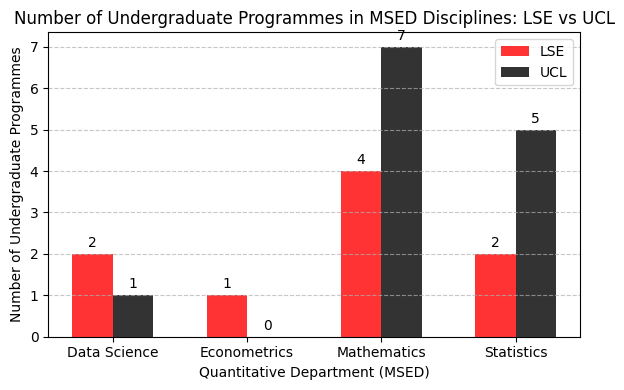

In [ ]:
#EDA 2.1
departments = num_programmes_df.index
lse_counts = num_programmes_df['LSE']
ucl_counts = num_programmes_df['UCL']

x = np.arange(len(departments))
width = 0.3

plt.figure(figsize=(6, 4))
bars_lse = plt.bar(x - width/2, lse_counts, width, label='LSE', color='red', alpha=0.8)
bars_ucl = plt.bar(x + width/2, ucl_counts, width, label='UCL', color='black', alpha=0.8)

for bar in bars_lse:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height), ha='center', va='bottom', fontsize=10)

for bar in bars_ucl:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Quantitative Department (MSED)', fontsize=10)
plt.ylabel('Number of Undergraduate Programmes', fontsize=10)
plt.title('Number of Undergraduate Programmes in MSED Disciplines: LSE vs UCL', fontsize=12)
plt.xticks(x, departments, rotation=0, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### Interpretation
- UCL offers 13 undergraduate programmes across four MSED disciplines, while LSE offers 9 — reflecting UCL’s traditional strength in STEM education.
- The two institutions show contrasting subject emphasis: **UCL offers more programmes in theoretical disciplines** such as Mathematics and Statistics, while **LSE leads in applied fields** such as Econometrics and Data Science.
- Although LSE offers fewer programmes in total, its distribution is more balanced across disciplines, with a strong presence in interdisciplinary and practical applications of quantitative skills.
- Notably, **LSE offers Econometrics**, which is entirely absent from UCL’s undergraduate programme list — offering a unique value proposition for students interested in statistical modelling in economics.
- For students not aiming to specialise in theoretical mathematics, **LSE’s broader and more interdisciplinary programme mix** may offer more flexibility and applied relevance.

#### Plot 2: Pie Charts – Internal Distribution of Programmes by Discipline (per University)

In [ ]:
#EDA 2.3
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Create subplot layout
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=["Programme Distribution by Department (LSE)", "Programme Distribution by Department (UCL)"])

#Pie chart 1 (LSE)
fig.add_trace(go.Pie(
    labels=departments,
    values=lse_counts,
    name="LSE",
    marker_colors=['#FF6666', '#FFB366','#6699FF','#66CC66'],
    hoverinfo='label+percent',
    textinfo='percent',
    insidetextorientation='radial'
), 1, 1)

#Pie chart 2 (UCL)
fig.add_trace(go.Pie(
    labels=departments,
    values=ucl_counts,
    name="UCL",
    marker_colors=['#FF6666', '#FFB366','#6699FF','#66CC66'],
    hoverinfo='label+percent',
    textinfo='percent',
    insidetextorientation='radial'
), 1, 2)

fig.update_layout(
    title_text="Programme Distribution by Department: LSE vs UCL",
    legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="center", x=0.5),
    height=500
)
fig.show()

##### Interpretation:
- **LSE’s programme mix is more evenly distributed**, with significant shares in Data Science and Econometrics.
- **UCL’s programme offerings are heavily weighted toward Mathematics**, highlighting its depth in pure and theoretical foundations.
- These differences suggest that **LSE focuses on real-world quantitative applications**, while **UCL offers a wider range of traditional STEM programmes** — an important distinction for students choosing between the two institutions.

### 4.1.2 Module Offerings
#### Plot 3: Bar Chart – Number of MSED Modules Offered

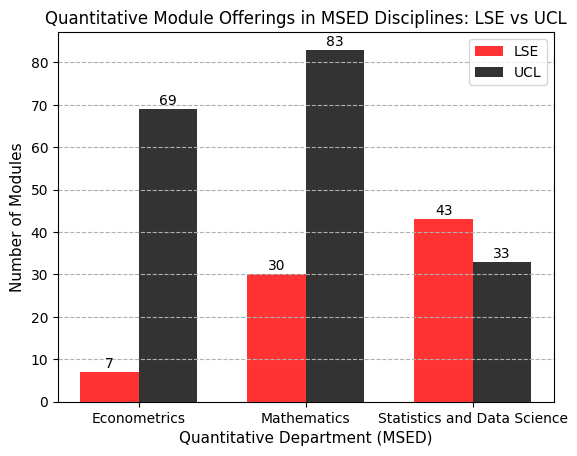

In [ ]:
# EDA 1.1
departments = num_modules_df.index.tolist()
lse_values = num_modules_df['LSE'].tolist()
ucl_values = num_modules_df['UCL'].tolist()

x = np.arange(len(departments))
width = 0.35

plt.bar(x, lse_values, width, label='LSE', color='red', alpha=0.8)
plt.bar(x + width, ucl_values, width, label='UCL', color='black', alpha=0.8)

for i in range(len(departments)):
    plt.text(x[i], lse_values[i] + 1, str(lse_values[i]), ha='center', fontsize=10)

for i in range(len(departments)):
    plt.text(x[i] + width, ucl_values[i] + 1, str(ucl_values[i]), ha='center', fontsize=10)

plt.xlabel('Quantitative Department (MSED)', fontsize=11)
plt.ylabel('Number of Modules', fontsize=11)
plt.title('Quantitative Module Offerings in MSED Disciplines: LSE vs UCL')
plt.xticks(x + width / 2, departments, rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend()

##### Interpretation:
- LSE and UCL offer a similar number of modules in Econometrics, Statistics, and Data Science.
- However, **UCL offers nearly three times as many Mathematics modules** as LSE — indicating a much stronger focus on theoretical STEM instruction.
- This disparity is likely a result of UCL’s larger student body, broader programme range, and emphasis on core STEM subjects like pure mathematics.
- Interestingly, LSE offers more modules in Statistics and Data Science than UCL. This reflects LSE’s social science orientation, where data-driven methods are central to disciplines like economics, public policy, and management.

##### Conclusion:
These findings suggest that **LSE’s quantitative strength lies in applied STEM fields**, particularly in Econometrics and Statistics, while **UCL provides broader and deeper theoretical coverage**, especially in Mathematics. LSE may appeal more to students seeking data-centric, interdisciplinary training, whereas UCL may be better suited for those pursuing rigorous mathematical foundations in traditional STEM.

## 4.2 Student Satisfaction
#### Research Question 2: How do students rate their experience in MSED programmes at LSE versus UCL?
**Motivation**
  
This section evaluates how students rate their experience in quantitative programmes at LSE and UCL using the National Student Survey (NSS). Key aspects include teaching quality, support, wellbeing, and organisation. These insights help assess how well each institution supports student learning and experience in MSED disciplines — critical for both academic and personal development.

**Description of Analysis**.
We use scraped NSS ratings from Discover Uni, focusing on nine key aspects (e.g., Teaching, Assessment, Mental Wellbeing). The analysis is structured to compare:
1. Institutional averages across all MSED programmes
2. Programme-specific scores to understand internal variation
All ratings are reported as percentages and reflect final-year undergraduate responses.                 

#### Plot 1: Bar Chart – Average NSS Scores by Aspect (LSE vs UCL)

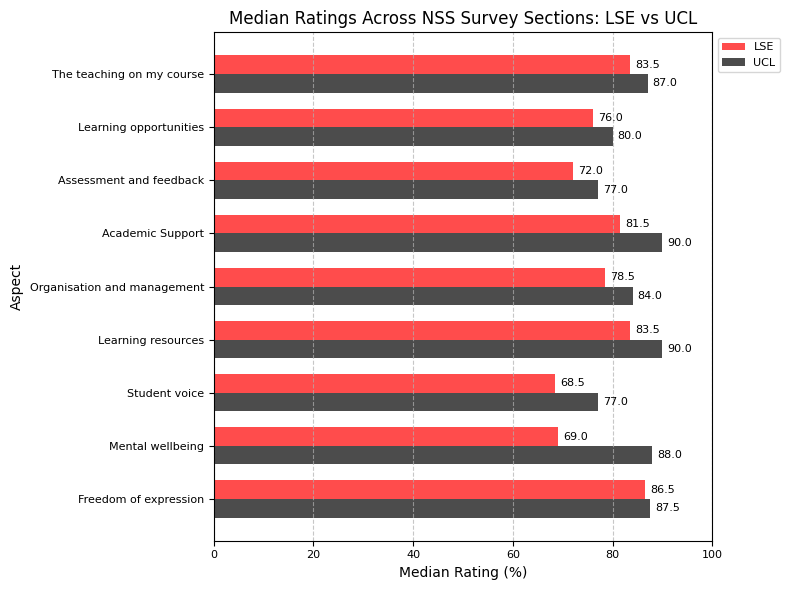

In [ ]:
# EDA 3.1
#sections are reordered to prioritise key aspects like “The teaching on my course” at the top.
section_names_ordered = list(reversed(section_names))

for aspect in section_names_ordered:
    lse_df[aspect] = pd.to_numeric(lse_df[aspect])
    ucl_df[aspect] = pd.to_numeric(ucl_df[aspect])

lse_median = lse_df[section_names_ordered].median()
ucl_median = ucl_df[section_names_ordered].median()

median_ratings = pd.DataFrame({'LSE': lse_median,'UCL': ucl_median})

plt.figure(figsize=(8, 6))
y = np.arange(len(section_names_ordered))
width = 0.35

plt.barh(y + width/2, median_ratings['LSE'], height = width, label = 'LSE', color = 'red', alpha = 0.7)
plt.barh(y - width/2, median_ratings['UCL'], height = width, label = 'UCL', color = 'black', alpha = 0.7)

plt.xlabel('Median Rating (%)', fontsize = 10)
plt.ylabel('Aspect', fontsize = 10)
plt.title('Median Ratings Across NSS Survey Sections: LSE vs UCL', fontsize = 12)
plt.yticks(y, section_names_ordered, fontsize = 8)
plt.xticks(fontsize =8)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=8)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

for i, v in enumerate(median_ratings['LSE']):
    plt.text(v + 1, i + width/2, f'{v:.1f}', va='center', fontsize=8)
for i, v in enumerate(median_ratings['UCL']):
    plt.text(v + 1, i - width/2, f'{v:.1f}', va='center', fontsize=8)

plt.xlim(0, 100)
plt.tight_layout()

**Note:** LSE is consistently presented first in all charts for visual coherence and since project is revolved around LSE, regardless of comparative rating levels.

##### Interpretation:
- UCL consistently outperforms LSE in student satisfaction across all aspects.  
- The most notable gap lies in Mental Wellbeing, UCL scores 88% and LSE only 69%. Contributing factors may include heavier workloads, limited counselling resources, or a more academically intense environment. While the issue may not be specific to MSED programmes, it suggests student support is a key area for improvement at LSE
- Differences in other categories are relatively small, indicating comparable academic delievery (Teaching Quality, Assessment and Feedback, and Learning Opportunities). These small differences may reflect varying student expectations rather than structural shortcomings.
- These insights challenge the perception that UCL offers a much better experience overall — LSE’s main weakness appears to lie in support, not teaching.

##### Limitations:
- Aggregated satisfaction data may mask variation across different course streams or cohorts within a single programme.
- Survey results are self-reported and subject to response bias.

#### Plot 2: Programme-Level Heatmaps (LSE and UCL)
While the bar chart highlights UCL’s overall lead in student satisfaction, the programme-specific heatmaps reveal important nuances within each institution. These reveal the extent of variation within universities, helping to contextualise the institutional medians and identify standout programmes as well as underperformers.

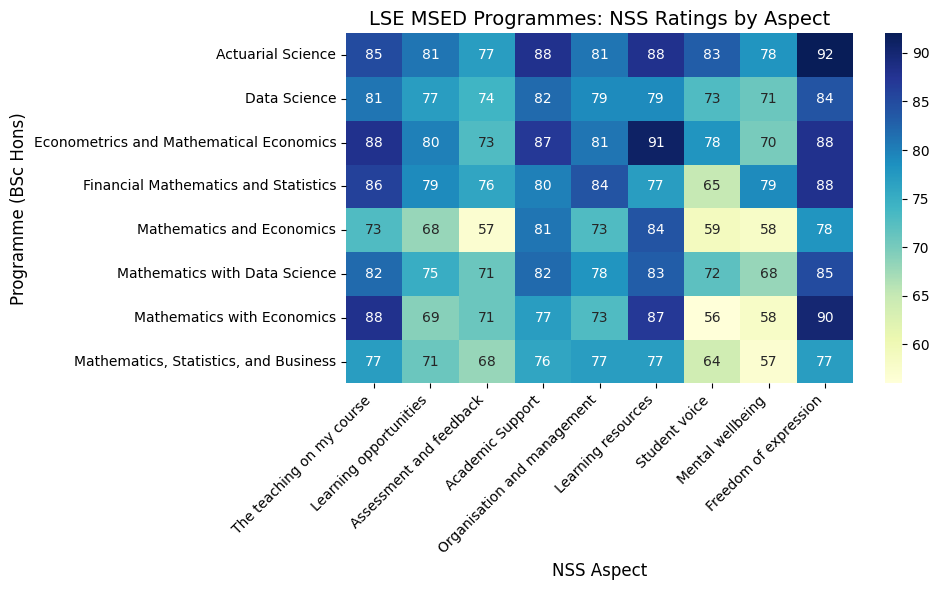

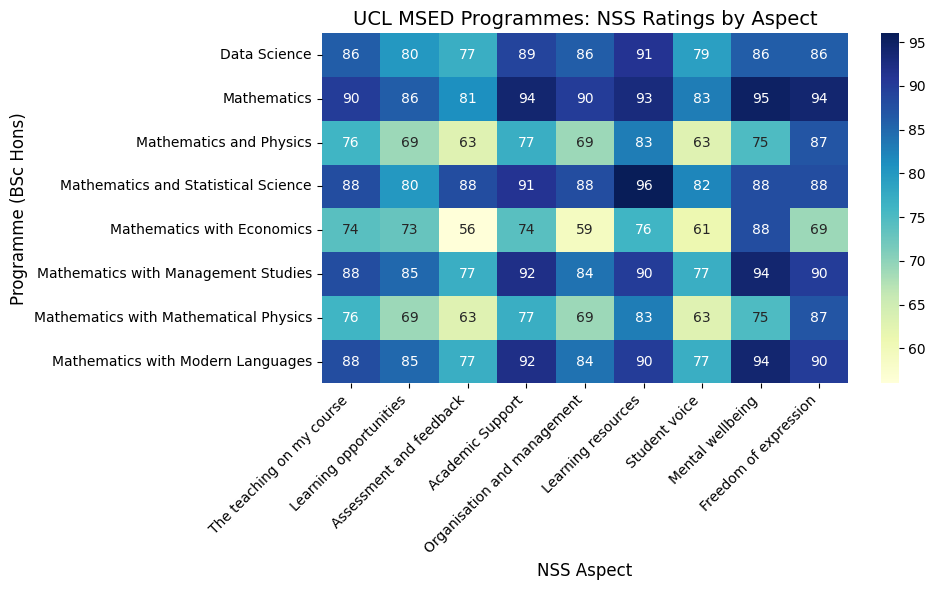

In [ ]:
#EDA 3.2

plt.figure(figsize=(10, 6))
sns.heatmap(lse_nss_df, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("LSE MSED Programmes: NSS Ratings by Aspect", fontsize=14)
plt.xlabel("NSS Aspect", fontsize=12)
plt.ylabel("Programme (BSc Hons)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.heatmap(ucl_nss_df, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("UCL MSED Programmes: NSS Ratings by Aspect", fontsize=14)
plt.xlabel("NSS Aspect", fontsize=12)
plt.ylabel("Programme (BSc Hons)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

**Note:**
A blue colormap is used across all heatmaps (LSE and UCL) for consistency and clarity. Institution-specific colors (e.g. red for LSE, black for UCL) were avoided to reduce interpretational bias and improve comparability.


##### Interpretation:
- At LSE, student satisfaction varies significantly across programmes, especially in aspects such as Mental Wellbeing, Assessment and Feedback, and Student Voice, where several programmes fall below 70%.
- In contrast, UCL's MSED programmes show more consistency, with most ratings clustered between 80–90%, indicating a more uniform student experience.
- Specific underperformers at LSE include Mathematics with Economics and Mathematics, Statistics and Business, which receive below-average scores in multiple categories.
- UCL programmes such as Mathematics with Management and Modern Languages stand out with high satisfaction scores across all aspects.

##### Limitations:
- NSS scores are based on self-reported survey responses, which may be affected by response bias or small sample sizes.
- Some ratings may be aggregated at the department level, limiting the precision of programme-level comparisons.
- Not all MSED programmes have complete NSS data available — coverage depends on Discover Uni listings.

##### Conclusion:  
UCL delivers a more consistently positive student experience across its MSED programmes, especially in wellbeing, support, and organisation. While LSE performs well in teaching for some courses, the wider variation in satisfaction suggests that students’ experiences may depend more heavily on programme choice. This highlights the importance of evaluating individual course quality rather than relying solely on institutional averages.

---
## 4.3 Graduate Outcomes
#### Research Question 3: Do graduate salaries and employment sectors for LSE MSED graduates reflect a strong quantitative foundation?


### 4.3.1 Graduate Salary Progression
**Motivation**  
We aim to assess whether the quantitative degrees offered by LSE and UCL result in competitive graduate salaries. Evaluating financial return alongside salary progression provides insight into each institution’s ability to prepare students for high-growth, STEM-adjacent careers.

**Description of Analysis**  
We compare salary trajectories at 15 months, 3 years, and 5 years post-graduation for each MSED programme at LSE and UCL. This time-based analysis captures both early career earnings and long-term trends, allowing us to evaluate whether these degrees translate into sustained economic value. All data is sourced from Discover Uni and reflects departmental-level salary reporting.

#### Plot 1: Line Chart – Graduate Salary Over Time
To assess the financial return of MSED degrees, we compare salary progression 15 months, 3 years, and 5 years post-graduation across LSE and UCL programmes.

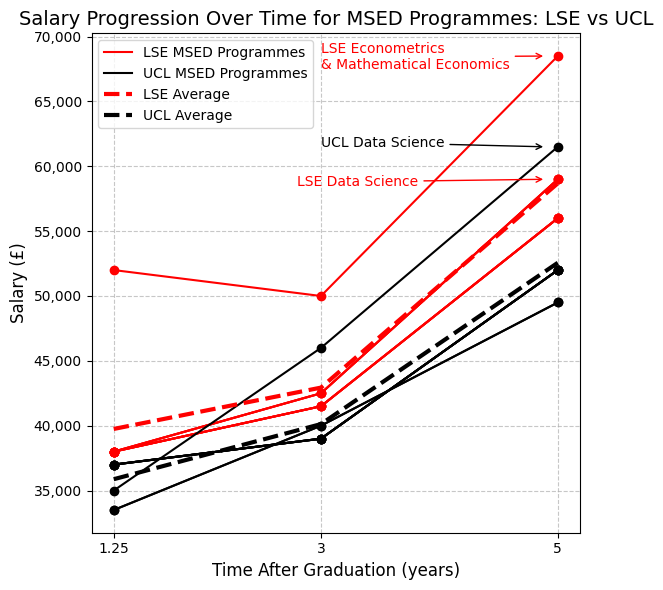

In [ ]:
# EDA 4.3
x_labels = ['1.25', '3', '5']
x_values = [1.25, 3, 5]

plt.figure(figsize=(6, 6))

# for legend later
lse_lines = []
ucl_lines = []

# plot programme-specific salary lines
for _, row in combined_salary_df.iterrows():
    color = 'red' if row['University'] == 'LSE' else 'black'
    line, = plt.plot(x_values, row[salary_columns], marker='o', linewidth=1.5, color=color)
    if row['University'] == 'LSE':
        lse_lines.append(line)
    else:
        ucl_lines.append(line)

# plot average salary lines
lse_avg = combined_salary_df[combined_salary_df['University'] == 'LSE'][salary_columns].mean()
ucl_avg = combined_salary_df[combined_salary_df['University'] == 'UCL'][salary_columns].mean()

lse_avg_line, = plt.plot(x_values, lse_avg, linestyle='--', color='red', linewidth=3, label='LSE Average')
ucl_avg_line, = plt.plot(x_values, ucl_avg, linestyle='--', color='black', linewidth=3, label='UCL Average')

# create legend
from matplotlib.lines import Line2D
custom_legend = [Line2D([0], [0], color='red', lw=1.5, label='LSE MSED Programmes'),
    Line2D([0], [0], color='black', lw=1.5, label='UCL MSED Programmes'),
    Line2D([0], [0], linestyle='--', color='red', lw=3, label='LSE Average'),
    Line2D([0], [0], linestyle='--', color='black', lw=3, label='UCL Average')]

plt.title("Salary Progression Over Time for MSED Programmes: LSE vs UCL", fontsize=14)
plt.xlabel("Time After Graduation (years)", fontsize=12)
plt.ylabel("Salary (£)", fontsize=12)
plt.xticks(x_values, x_labels)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{int(x):,}')
plt.legend(handles=custom_legend, loc='upper left', fontsize=10)
plt.annotate("LSE Econometrics\n& Mathematical Economics", xy=(4.9, 68500), xytext=(3.0, 67500), arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')
plt.annotate("UCL Data Science", xy=(4.9, 61500), xytext=(3.0, 61500), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10, color='black')
plt.annotate("LSE Data Science", xy=(4.9, 59000), xytext=(2.8, 58500), arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')
plt.tight_layout()

**Rationale**  
**1. Why Use Average (Not Median)?**  
We use average salary to capture variation across programmes and over time. While the median is less sensitive to outliers and yielded the same core insight, that LSE's median salary is higher than UCL's, its line visually overlapped with one UCL programme, making interpretation harder. The average offers greater visual clarity and more distinguishable institutional comparisons.

**2. Why Aggregate by Institution (Not Programme)?**  
A direct programme-level comparison was not feasible due to inconsistent programme titles and structures across LSE and UCL. Aggregating by institution provides a cleaner, standardised basis for analysis while avoiding visual clutter from overlapping programme lines.

**3. Why Use Consistent Colour by Institution?**  
Each university’s programmes are plotted in a consistent colour (red for LSE, black for UCL) to maintain visual coherence and support intuitive grouping, especially when multiple line plots are displayed.

##### Interpretation:
- Both LSE and UCL show a strong upward salary trajectory, confirming the long-term economic value of MSED programmes.
- LSE consistently leads UCL in salary outcomes, especially 5 years post-graduation, suggesting stronger returns on its quantitative education/ training.
- LSE’s **Econometrics & Mathematical Economics** programme stands out as the top earner (£68,500 after 5 years), suggesting a premium employers place on econometric skillsets. This is notable as UCL offers no equivalent, giving LSE a unique competitive edge.
- UCL’s **Data Science** course reaches £61,500, outperforming LSE’s Data Science counterpart, possibly highlighting its tech-sector strength.
- Salary gaps widen over time, implying LSE’s degrees may offer more robust career acceleration in high-paying sectors like finance and consulting.
- Intra-institution variation is greater at LSE, indicating that specific programmes (e.g., Econometrics, Financial Mathematics) may unlock higher-earning opportunities.
- The early dip and later recovery in LSE's Econometrics & Mathematical Economics line may reflect postgrad study or delayed entry into high-paying roles.

##### Limitations
- Salary data is most likely reported at the department level,which may mask variation across individual programmes.
- Salary figures are based on graduate survey responses, which may be affected by low response rates and potential bias — so results should be seen as indicative, not definitive.

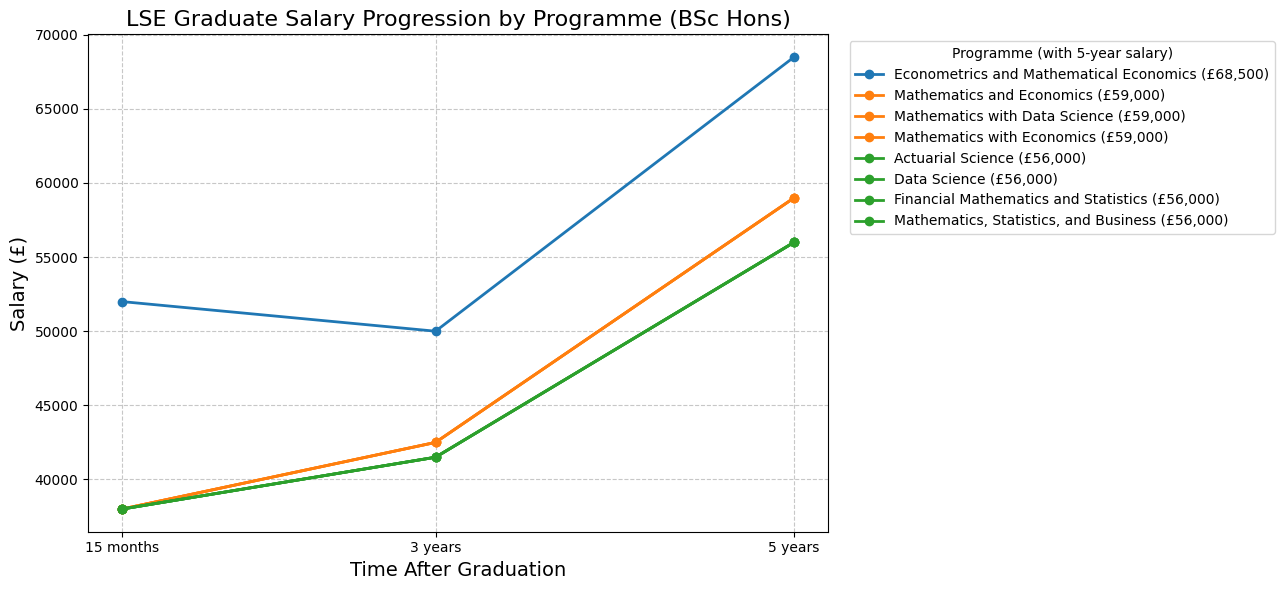

In [ ]:
# EDA 4.1
plt.figure(figsize=(13, 6))

# assign colors based on unique salary progressions as some of them overlap
salary_patterns = {}
colors = plt.cm.tab10.colors
pattern_to_color = {}
color_map = []

for i, row in lse_sorted.iterrows():
    pattern = tuple(row[lse_salary_columns])
    if pattern not in pattern_to_color:
        pattern_to_color[pattern] = colors[len(pattern_to_color) % len(colors)]
    color_map.append(pattern_to_color[pattern])

x_values = [1.25, 3, 5]
x_labels = ['15 months', '3 years', '5 years']
for idx, row in lse_sorted.iterrows():
    program_name = row['Programme (BSc Hons)']
    y_values = []
    for col in lse_salary_columns:
        value = str(row[col]).replace('£', '').replace(',', '').strip()
        y_values.append(float(value))
    plt.plot(x_values, y_values, marker='o', linewidth=2, color=color_map[idx], label=f"{program_name} (£{y_values[-1]:,.0f})")

plt.title("LSE Graduate Salary Progression by Programme (BSc Hons)", fontsize=16)
plt.xlabel("Time After Graduation", fontsize=14)
plt.ylabel("Salary (£)", fontsize=14)
plt.xticks(x_values, x_labels)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Programme (with 5-year salary)",
           bbox_to_anchor=(1.02, 1),
           loc='upper left',
           fontsize=10)
plt.tight_layout()
plt.show()

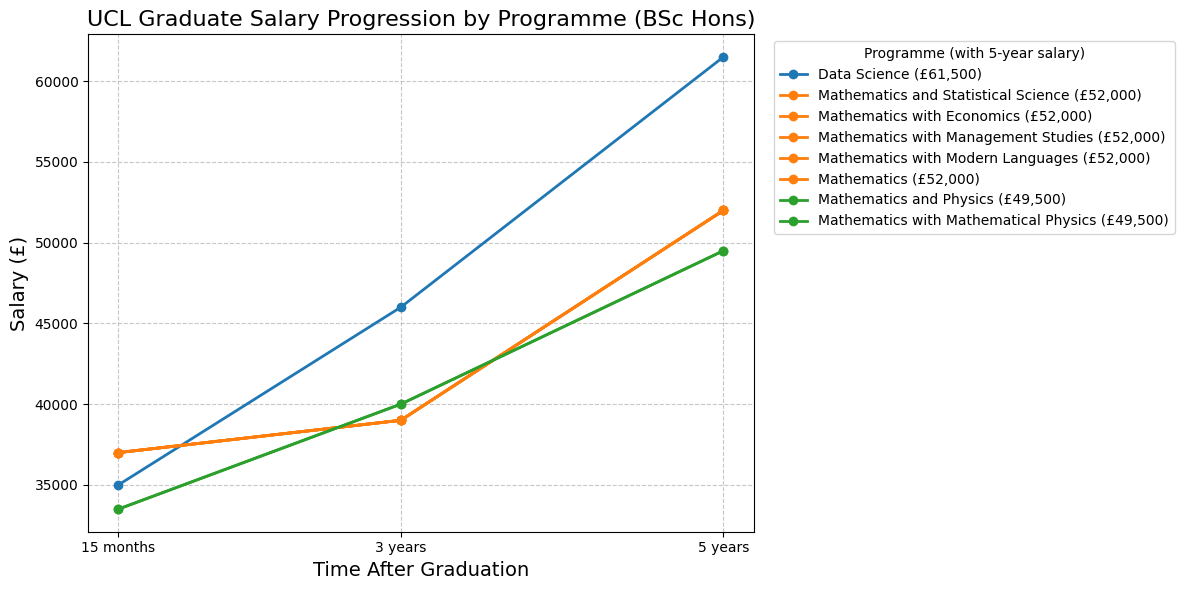

In [ ]:
# EDA 4.2
plt.figure(figsize=(12, 6))

# assign colors based on unique salary progressions as some of them overlap
salary_patterns = {}
colors = plt.cm.tab10.colors
pattern_to_color = {}
color_map = []

for i, row in ucl_sorted_by_salary.iterrows():
    pattern = tuple(row[ucl_salary_columns])
    if pattern not in pattern_to_color:
        pattern_to_color[pattern] = colors[len(pattern_to_color) % len(colors)]
    color_map.append(pattern_to_color[pattern])

x_values = [1.25, 3, 5]
x_labels = ['15 months', '3 years', '5 years']
for idx, row in ucl_sorted_by_salary.iterrows():
    program_name = row['Programme (BSc Hons)']
    y_values = []
    for col in ucl_salary_columns:
        value = str(row[col]).replace('£', '').replace(',', '').strip()
        y_values.append(float(value))
    plt.plot(x_values, y_values, marker='o', linewidth=2, color=color_map[idx], label=f"{program_name} (£{y_values[-1]:,.0f})")

plt.title("UCL Graduate Salary Progression by Programme (BSc Hons)", fontsize=16)
plt.xlabel("Time After Graduation", fontsize=14)
plt.ylabel("Salary (£)", fontsize=14)
plt.xticks(x_values, x_labels)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Programme (with 5-year salary)",
           bbox_to_anchor=(1.02, 1),
           loc='upper left',
           fontsize=10)
plt.tight_layout()
plt.show()

#### Plot 2: Violin Plot – Salary Distribution by Institution
##### Motivation:
To examine how salaries are spread within each university, we visualise the distribution of earnings across all MSED programmes.

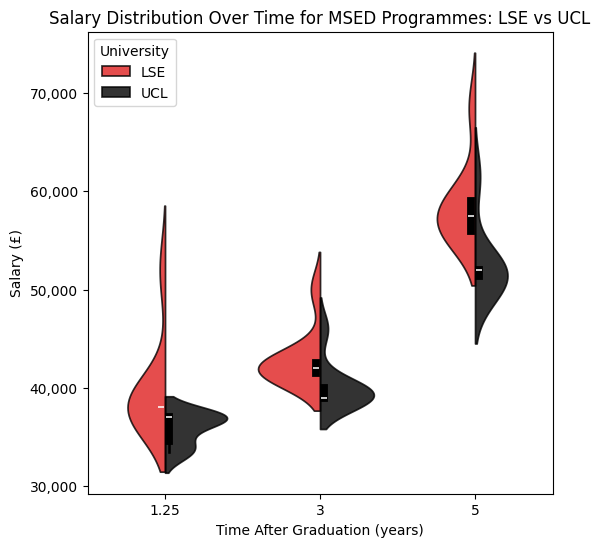

In [ ]:
# EDA 4.4

palette = {"LSE": "red", "UCL": "black"}

plt.figure(figsize=(6, 6))
sns.violinplot(data=combined_long_df, x="Time After Graduation", y="Salary", hue="University", split=True, palette=palette, alpha=0.8)

plt.title("Salary Distribution Over Time for MSED Programmes: LSE vs UCL")
plt.ylabel("Salary (£)")
plt.xlabel("Time After Graduation (years)")
plt.xticks(ticks=[0, 1, 2], labels=["1.25", "3", "5"])
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{int(x):,}')

##### Interpretation (Additional Insights from Violin Plot):

- LSE shows wider salary distribution, especially at 5 years, suggesting greater variation in outcomes and the presence of high earners, likely from top programmes like Econometrics.
- LSE’s right-skewed distribution suggests a few graduates earn significantly more than their peers, pulling the average up. This highlights how the average can overstate typical outcomes, but it also reveals the potential for very high earnings in certain programmes.
- UCL’s distribution is narrower and more symmetric, implying more consistent but less extreme salary outcomes.
- The violin plot complements the line chart by revealing salary spread, not just central tendency, offering a fuller view of each institution’s graduate performance.

##### Limitations (for both plots)
- Salary data is likely reported at the department level, which may mask variation across individual programmes.
- Figures are based on graduate survey responses, which may be affected by small sample sizes or response bias.
- Outliers may distort the average salary, especially at LSE where a wider spread is observed.
- The data does not account for further study, career breaks, or other non-linear career paths.

##### Conclusion:
Together, these visualisations suggest that LSE’s quantitative programmes not only outperform UCL on average but also produce a wider spread of top earners — reinforcing LSE’s strength in preparing students for high-growth, high-paying careers.

---
## 5. Conclusion and Recommendations

In the above sections, we compared the MSED programmes in LSE through 4 channels and below is the summary:


### Key Findings
1. Channel 1: Courses provided by MSED Departments

According to our analysis, LSE and UCL have a very different focus in terms of type of courses provided by their MSED departments. UCL provides a significantly higher number of traditional quantitative subjects such as Mathematics. On the other hand, LSE provides more applicational quantitative courses such as Statistic and Data science.

2. Channel 2: MSED undergraduate programmes provided

Overall, UCL provides more MSED undergraduate programmes than LSE. The two unversities again show diversity in coures' natures, where UCL offer more courses on treditional STEM courses while LSE leads in applicational aspect. One key point to be noted is that only LSE provides undergraduate course in Econometrics, which shows its strength and specialty in applicational STEM.

3. Channel 3: Students' satisfaction

Based on NSS survey results, it is observed that UCL has higher overall course ratings over LSE. This gap arises mainly because of LSE's significantly lower ratings in Mental Health-related factors. The two universities acquire similar level of ratings across other aspects, especially in Teaching Qaulity, indicating the oustanding academic support provided by the two universities.



4. Channel 4: Graduate prospect


 Over a course of 5 years after their graduation, graduates from both universities experienced postive salary growth, with students from applicational disciplines such as Econometrics and Data Science earning highest income. Overall, LSE leads UCL in terms of graduates' economic prospect.

### Implications

#### 1. Can LSE be considered as "STEM Strong" ?

From our findings, LSE provides a relatively lower number of STEM courses compared to UCL and lacks behind especially in teaching resources for traditional STEM subject such as Mathematics. There is still room for improvement in terms of STEM course diversity for the university.

However, LSE demonstrates a high teaching quality in STEM subjects, as reflected by its high students' ratings in teaching-related aspects in the NSS survey. Moreover, the university specializes in applicational STEM subject like Econometrics. This is a key advantage for LSE as UCL does not provide similar undergraduate programme. The STEM subjects in LSE also carry a high economic values given LSE's graduates' lead in salaries over UCL's. It is worthwile for LSE to further develop and consolidate its edge in applicational STEM courses.

#### 2. How can LSE communicate its strengths to prospective student?

Based on our findings, LSE's major advantage lies in teaching quality and graduate prospect. Despite a limited variety, the university performs oustandingly in the STEM courses it provides. LSE students are extremely satisfied with Teaching Resources, Academic Support and Learning Opportunities provided by the school. Adding on that, LSE's specialty in applicational STEM subjects equip students with technical skillsets that are favored in job market, leading to a better monetary prospect for its graduates.

To conclude, LSE can put its focus on prospective students who express interests in applicational usage of STEM-related concepts and those who are more career-focused. Targetting these types of students, the university could convey to them its strengths of high teahcing quality as well as leading graduate prospect, making it more likely for them to find the school preferrable over others.

### Limitations

1. There is limited source of data and sample size might not be large enough, which could cause biases in results such as NSS survey findings and graduate survey outcomes.

2. On top of course taken, other factors such as univeristy reputation, employers' preferences and students' quality could be potantial factors affecting graduate prospect. It is difficult to eliminate all confounders when conducting the analysis so our finding assumes course taken to be the major driver.

3. Students' ratings could be subjective and influenced by students' varied expectations regarding their learning experiences. This may cause deviation from the actual performance of the univerisites. However, results for both univerities subject to the same concern and the impact shall be minimized.


### References:

1. UCL undergraduate courseguide website : https://www.lse.ac.uk/resources/calendar/courseGuides/undergraduate.htm
2. UCL module catalogue :https://www.ucl.ac.uk/module-catalogue?collection=drupal-module-catalogue&facetsort=alpha&num_ranks=20&daat=10000&sort=title

3. LSE programme searcher: https://www.google.com/url?q=https%3A%2F%2Fwww.lse.ac.uk%2Fprogrammes%2Fsearch-courses

4. UCL programme searcher: https://www.google.com/url?q=https%3A%2F%2Fwww.ucl.ac.uk%2Fprospective-students%2Fundergraduate%2Fundergraduate-courses

5. DiscoverUni; https://discoveruni.gov.uk/